# Analysing Structured Data with Pytorch
### *Introduction to Pytorch*

---


During the first and second lectures, you have been introduced to traditional Neural Networks and its essential constituents (neuron, weights and bias, activation function, loss function, optimizer, regularizer...). In this lab, we will see how we can **build our own multi-layer perceptrons** for processing **structured data** with **Pytorch**.

By the end of this lab, you will be able to:
- import the relevant classes from PyTorch for creating a sequential model
- prepare the dataset for modeling
- design the architecture of a custom multi-layer perceptron with fully connected layer, dropout, optimizer.
- choose the relevant loss function and activation functions for your data
- print the summary of your model
- train and evaluate the performance of your model
- print relevant graphs for assessing the training of your model

In this lab, we will be working only on structured data for supervised learning:

1. Regression: Iris
2. Multi-class classification: MNIST
3. Binary classification: German Credit Approval


Let's get started!

# Predicting class of iris plant (regression)

## Dataset

The dataset we will be using is the famous iris.

This is a small classic dataset from Fisher, 1936. Among the early datasets that have been used to test classification algorithms.

There are three classes in the data set, each with fifty occurrences, and each class represents a certain kind of iris plant (Setosa, Versicolour, and Virginica).

The detail information about the data set can be found in UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/53/iris)

This dataset is available here: https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

## Objective

Our goal is to build a Neural Network model that can predict accurately the class of iris plant (Logistic regression task).

## Instructions

This is a guided exercise where most of the code have already been pre-defined. Your task is to fill the remaining part of the code (it will be highlighted with placehoders) to train and evaluate your model.

This exercise is split in several parts:
1.   Loading and Exploration of the Dataset
2.   Preparing the Dataset
3.   Defining the Architecture of the Multi-Layer Perceptron
4.   Training and Evaluation of the Model
5.   Analysing the Results


### 1. Loading and Exploration of the Dataset

**[1.1]** First we need to import the relevant class of PyTorch

In [ ]:
# Placeholder for student's code

In [1]:
# Solution
import torch
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#im

**[1.2]**
Then we will load the dataset and save the `data` and `target` into two different variables named `X` and `y`.

In [2]:
# Placeholder for student's code
iris = load_iris()

In [3]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Solutionaa

X = iris.data
y = iris.target

**[1.3]**
Now, we will split the dataset into training and testing sets

In [ ]:
# Placeholder for student's code

In [5]:
# Solution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 2.   Preparing the Dataset

**[2.1]**
We will need to standardize both the features for the training and testing sets by importing StandardScalar from sklearn.preprocessing

In [ ]:
# Placeholder for student's code

In [6]:
# Solution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**[2.2]** Let's print the scaled version of the first observation of the training set

In [ ]:
# Placeholder for student's code

In [7]:
# Solution
print(X_train[0])

[-1.47393679  1.20365799 -1.56253475 -1.31260282]


**[2.3]** Let's convert the data to PyTorch tensors

In [ ]:
# Placeholder for student's code

In [8]:
# Solution
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

### 3.   Defining the Architecture of the Multi-Layer Perceptron

**[3.1]** Import `torch.nn` as `nn` and `torch.nn.functional` as `F`

In [ ]:
# Placeholder for student's code

In [9]:
# Solution
import torch.nn as nn
import torch.nn.functional as F

**[3.2]** Then we will set the seeds for Pytorch in order to get reproducible results

In [ ]:
# Placeholder for student's code

In [10]:
# Solution
torch.manual_seed(42)

**[3.3]** Then we will create a variable called `device` that will automatically select a GPU if available. Otherwise it will default to CPU.

In [ ]:
# Placeholder for student's code

In [12]:
# Solution
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

**[3.4]** Now we will create a variable called `in_hidden_layer` by instanciating a nn.Linear() class with 8 fully connected neurons(i.e. a hidden layer)

In [ ]:
# Placeholder for student's code

In [13]:
# Solution
in_hidden_layer = nn.Linear(X_train.shape[1], 8)

**[3.5]** Now we will create a connection of hidden layer of 8 fully connected units to output neuron and save it into a variable called `hidden_out_layer`

In [ ]:
# Placeholder for student's code

In [14]:
# Solution
hidden_out_layer = nn.Linear(8, 3)

**[3.6]** Finally let's stack these layers with a ReLu in between using nn.Sequential() class and save it into a variable called `model`


In [ ]:
# Placeholder for student's code

In [15]:
# Solution
model = nn.Sequential(
    in_hidden_layer,
    nn.ReLU(),
    hidden_out_layer
)

**[3.7]** Set `model` to use the device available

In [ ]:
# Placeholder for student's code

In [16]:
# Solution
model.to(device)

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=3, bias=True)
)

**[3.8]**  Print the architecture of `model`

In [ ]:
# Placeholder for student's code

In [17]:
# Solution:
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=3, bias=True)
)


### 4. Training and Evaluation of the Model

**[4.1]**  Instantiate a `nn.CrossEntropyLoss()` and save it into a variable called `criterion` to measure the error

In [ ]:
# Placeholder for student's code

In [18]:
# Solution
criterion = nn.CrossEntropyLoss()

**[4.2]**  Instantiate a `torch.optim.Adam()` optimizer with the model's parameters and 0.001 as learning rate and save it into a variable called `optimizer`

In [ ]:
# Placeholder for student's code

In [19]:
# Solution
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.001)

**[4.3]** **Training:** Now it is finally time to train our model. Create a for loop that will iterate 500 times the following logics:
- perform the forward propagation and get the model predictions
- calculate the loss between the predictions and the actuals
- reset the gradients
- perform back propagation
- update the weights

In [ ]:
# Placeholder for student's code
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [40]:
# Solution

epochs = 700
losses = []
for epoch in range(epochs):
    outputs = model(X_train) # Forward Propagation and get the model predictions
    loss = criterion(outputs, y_train) # Calculate the loss between the predictions and the actuals
    losses.append(loss.detach().cpu().numpy()) # Keep track of the losses

    optimizer.zero_grad()  # Reset the gradients
    loss.backward()  # Back Propagation
    optimizer.step() # Update the weights

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/700], Loss: 0.0627
Epoch [200/700], Loss: 0.0601
Epoch [300/700], Loss: 0.0579
Epoch [400/700], Loss: 0.0559
Epoch [500/700], Loss: 0.0543
Epoch [600/700], Loss: 0.0529
Epoch [700/700], Loss: 0.0516


**[4.4]** Testing: We can evaluate the performance of this model on the testing set

In [ ]:
# Placeholder for student's code

In [41]:
# Solution
with torch.no_grad(): # disables gradient tracking, faster inference
    model.eval()
    predictions = model(X_test)
    _, predicted_labels = torch.max(predictions, 1)

[4.5] We can evaluate the accuracy of this model by calling accuracy_score

In [ ]:
# Placeholder for student's code

In [42]:
# Solution
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test.cpu().numpy(), predicted_labels.cpu().numpy())
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 1.0000


### 5. Analysing the Results

**[5.1]** Now we will import the packages of pandas and matplotlib to polt the loss/error

In [ ]:
# Placeholder for student's code

In [43]:
# Solution
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**[5.2]** Plot the loss where `ylabel` is loss/error and `xlabel` is Epoch

In [ ]:
# Placeholder for student's code

Text(0.5, 0, 'Epoch')

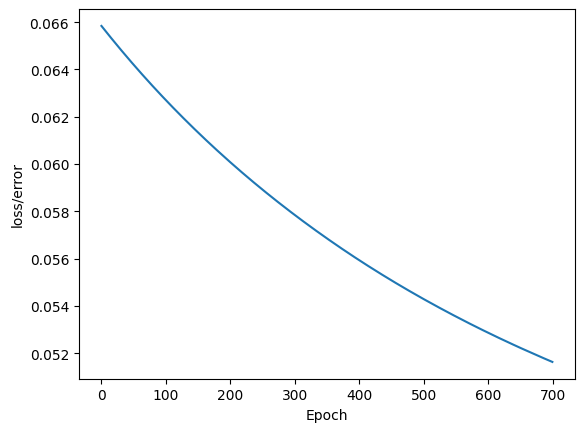

In [44]:
# Solution
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')